Natalie Rehfeld
A8 6.8, 6.25, 6.63, 6.64

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import math
import random
import scipy
import seaborn as sns
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits import mplot3d
from scipy.stats import norm
import pylab as py

**6.8 A high-voltage power supply should have a nominal
output voltage of 350 V. A sample of four units is
selected each day and tested for process-control purposes. The data shown in Table 6E.3 give the difference between the observed reading on each unit and
the nominal voltage times ten; that is,
xi = (observed voltage on unit i - 350)10**

In [4]:
data=pd.read_csv('drive/MyDrive/Data_6.8.csv', sep=',', na_values=".")
data

,x1,x2,x3,x4
0,6,9,10,15
1,10,4,6,11
2,7,8,10,5
3,8,9,6,13
4,9,10,7,13
5,12,11,10,10
6,16,10,8,9
7,7,5,10,4
8,9,7,8,12
9,15,16,10,13


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x1      20 non-null     int64
 1   x2      20 non-null     int64
 2   x3      20 non-null     int64
 3   x4      20 non-null     int64
dtypes: int64(4)
memory usage: 768.0 bytes


In [6]:
x = data.to_numpy()

In [7]:
x_bar = []
r = []

In [ ]:
for group in x:
    x_bar.append(group.mean())
    r.append(group.max() - group.min())
#print(x_bar)
#print(r)
m=len(x_bar)
print('points in x, ', m)

[Text(0, 0.5, 'Range'), Text(0.5, 0, 'Group')]

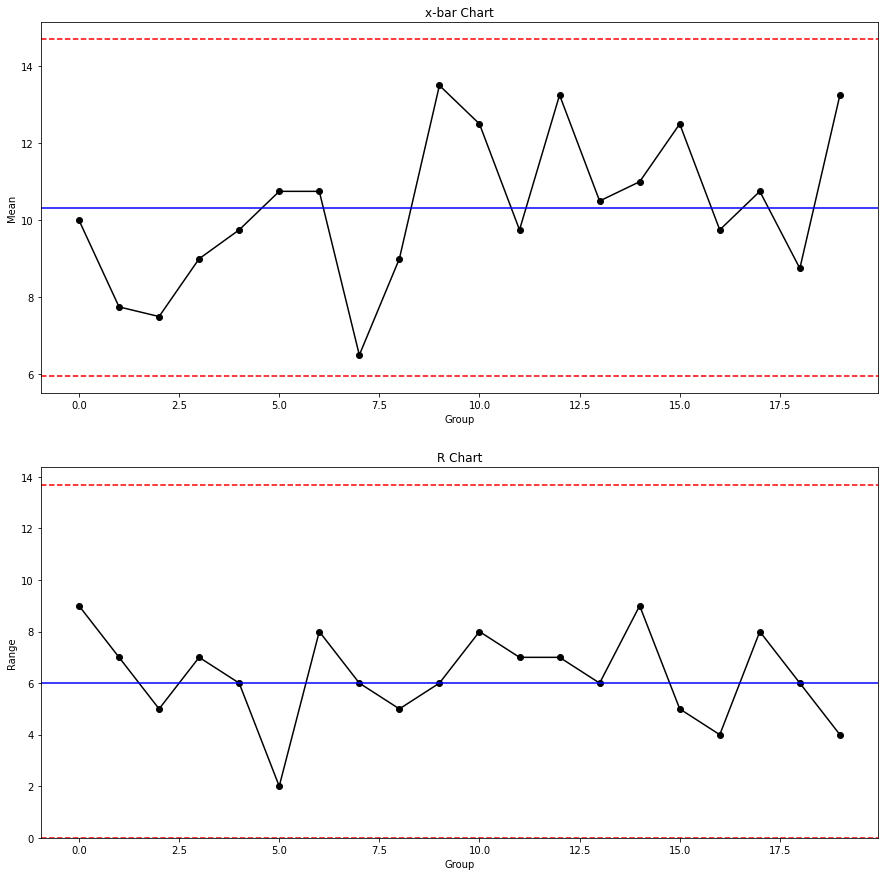

In [9]:
# Plot x-bar and R charts
fig, axs = plt.subplots(2, figsize=(15,15))

# x-bar chart
# Chart parameters A2=0.577, D3, and D4 see the ref for other sample size
A2=0.729     #n=5
D3=0         #n=5
D4=2.282     #n=5

axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(x_bar)+A2*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)-A2*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)), color='blue')
axs[0].set_title('x-bar Chart')
axs[0].set(xlabel='Group', ylabel='Mean')

# R chart
axs[1].plot(r, linestyle='-', marker='o', color='black')
axs[1].axhline((D4*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((D3*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((statistics.mean(r)), color='blue')
axs[1].set_ylim(bottom=0)
axs[1].set_title('R Chart')
axs[1].set(xlabel='Group', ylabel='Range')

In [10]:
i = 0
control = True
for group in x_bar:
    if group > statistics.mean(x_bar)+A2*statistics.mean(r) or group < statistics.mean(x_bar)-A2*statistics.mean(r):
        print('Group', i, 'out of mean control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

All points within control limits.


In [11]:
i = 0
control = True
for group in r:
    if group > D4*statistics.mean(r):
        print('Group', i, 'out of range cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

All points within control limits.


In [12]:
data2 = pd.read_csv('drive/My Drive/Data_6.8s.csv', sep=',', na_values=".")
data2

,stock
0,6
1,10
2,7
3,8
4,9
...,...
75,14
76,10
77,11
78,12


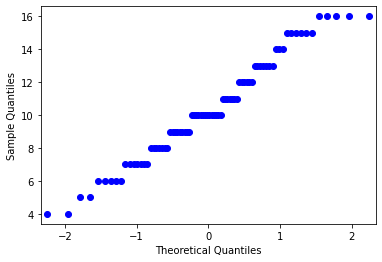

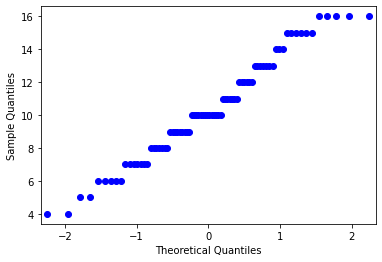

In [14]:
sm.qqplot(data2['stock'])